In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from pandas.plotting import scatter_matrix
%matplotlib inline

In [63]:
df = pd.read_csv('grad.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [64]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [65]:
df2 = pd.crosstab(index=[df['admit']], columns=[df['rank']], margins=True)

In [66]:
df2

rank,1,2,3,4,All
admit,,,,,
0,28,97,93,55,273
1,33,54,28,12,127
All,61,151,121,67,400


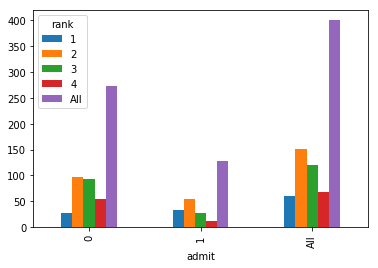

In [67]:
df2.plot(kind="bar")

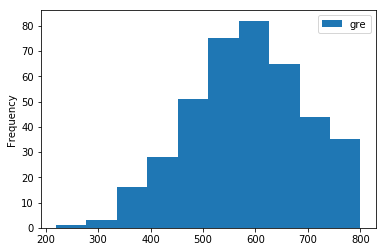

In [68]:
df.plot( x='gpa', y='gre', kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001127C3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011C36B38>]], dtype=object)

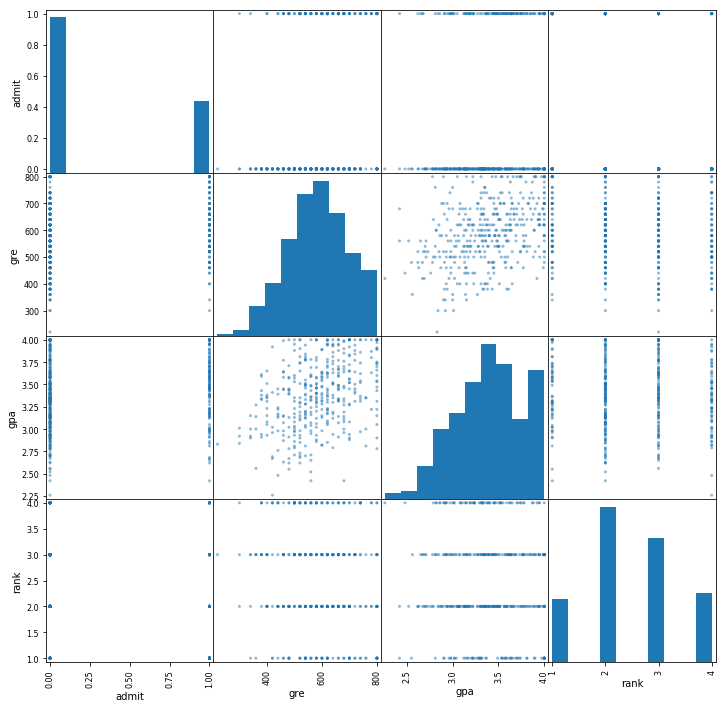

In [69]:
scatter_matrix(df, figsize=(12,12))

In [70]:
y = df.admit


In [71]:
X = df[['gre','gpa','rank']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
model = LogisticRegression().fit(X_train, y_train)

In [74]:
model.score(X_test, y_test)

0.71999999999999997

In [75]:
model.coef_

array([[ 0.0012195 ,  0.37446307, -0.64983504]])

In [76]:
model.intercept_

array([-1.23945284])

In [77]:
from itertools import combinations

In [78]:
total = 0
for i in range(1,11):
    total += len(list(combinations(['gpa', 'gre', 'rank'],i)))

In [80]:
rows = []
for i in range(1,11):
    combos = list(combinations(['gpa', 'gre', 'rank'],i))
    for j,com in enumerate(combos):
        y = df.admit
        X = pd.DataFrame(df, columns=com)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model = linear_model.LogisticRegression(fit_intercept=True).fit(X_train, y_train)
        score = model.score(X_test, y_test)
        s = ', '.join(com)
        rows.append({'Score':score, 'Columns':s, 'Coef':model.coef_,'Int':model.intercept_})
        # print('score:', score, 'columns:', s)
df3 = pd.DataFrame(rows)
df3.head()

,Coef,Columns,Int,Score
0,[[0.319303457297]],gpa,[-1.81404627438],0.681818
1,[[0.00139291052464]],gre,[-1.54917610063],0.681818
2,[[-0.504582785938]],rank,[0.429516683081],0.681818
3,"[[0.12683616908, 0.00124646717199]]","gpa, gre",[-1.891342199],0.681818
4,"[[0.504696239715, -0.568382775255]]","gpa, rank",[-1.10398498603],0.757576


In [81]:
y_hat = model.predict(X_test)

In [82]:
confusion_matrix(y_test, y_hat)

array([[90,  0],
       [32, 10]], dtype=int64)

In [83]:
model.score(X_test, y_test)

0.75757575757575757